In [54]:
#!pip install pandas seaborn scikit-learn lmfit mahotas imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions.functions import TE_MSD,Michalet,set_size,pool_data
from sklearn.cluster import KMeans
import matplotlib as mpl
import seaborn as sns
import random

%matplotlib inline
%reload_ext autoreload

# Experimental condition
dt = 0.05

# Initial filtering
minframe=8
maxframe=80
rsquared_threshold=-1000

# Small $R_S$

In [63]:
files = ["Data/SM1_WNT/tracks135.csv","Data/SM2_WNT/tracks135.csv","Data/SM3_WNT/tracks135.csv","Data/SM4_WNT/tracks135.csv","Data/SM5_WNT/tracks135.csv","Data/SM6_WNT/tracks135.csv","Data/SM7_WNT/tracks135.csv","Data/SM8_WNT/tracks135.csv","Data/SM10_WNT/tracks135.csv"]
df135 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=[1,5])

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  8 , maxframe =  80 , R2 threshold =  -1000
Fit option:  [1, 5]
Reading filenames in  ['Data/SM1_WNT/tracks135.csv', 'Data/SM2_WNT/tracks135.csv', 'Data/SM3_WNT/tracks135.csv', 'Data/SM4_WNT/tracks135.csv', 'Data/SM5_WNT/tracks135.csv', 'Data/SM6_WNT/tracks135.csv', 'Data/SM7_WNT/tracks135.csv', 'Data/SM8_WNT/tracks135.csv', 'Data/SM10_WNT/tracks135.csv'] ...
Analysis for Data/SM1_WNT/tracks135.csv ...
32  tracks were kept out of  913 . Done.
Analysis for Data/SM2_WNT/tracks135.csv ...
95  tracks were kept out of  4584 . Done.
Analysis for Data/SM3_WNT/tracks135.csv ...
74  tracks were kept out of  3162 . Done.
Analysis for Data/SM4_WNT/tracks135.csv ...
32  tracks were kept out of  1118 . Done.
Analysis for Data/SM5_WNT/tracks135.csv ...
143  tracks were kept out of  4222 . Done.
Analysis for Data/SM6_WNT/tracks135.csv ...
179  tracks were kept out of  5356 . Done.
Analysis for Data/SM7_WNT/tracks135.csv ...
143  

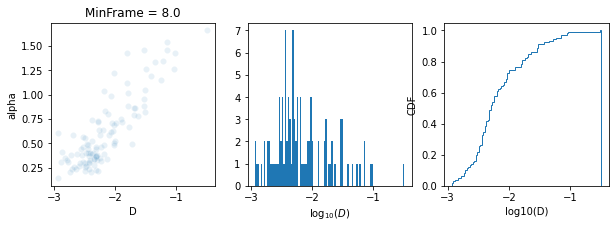

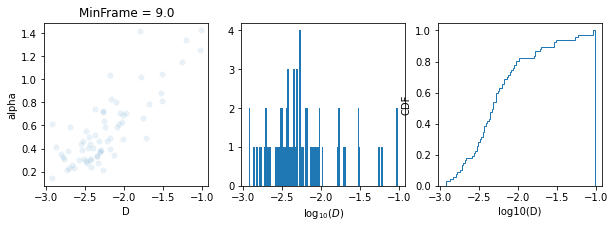

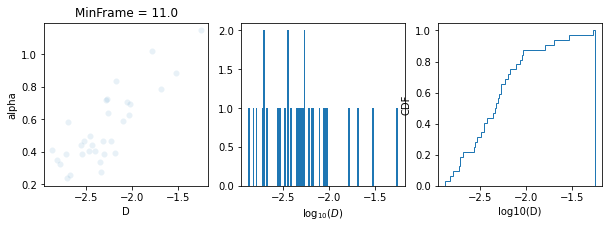

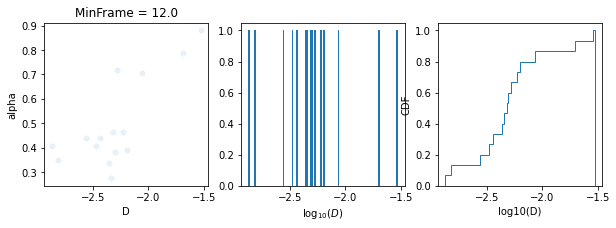

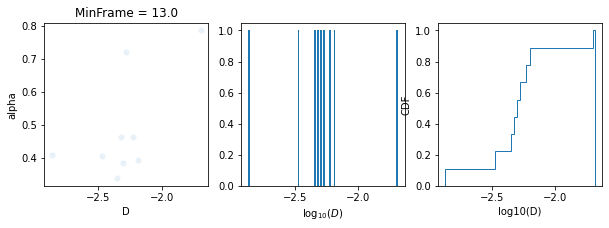

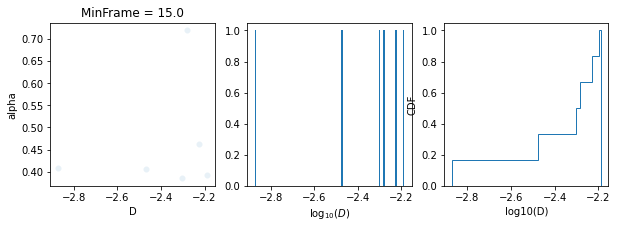

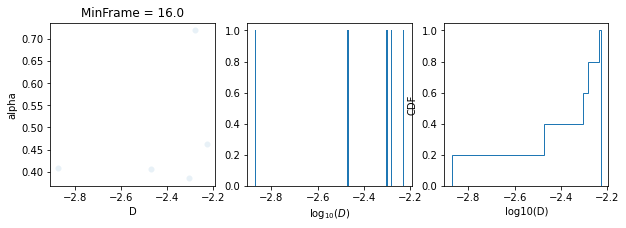

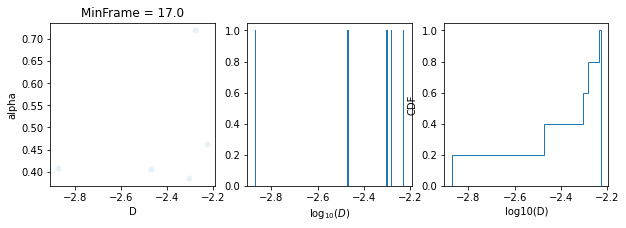

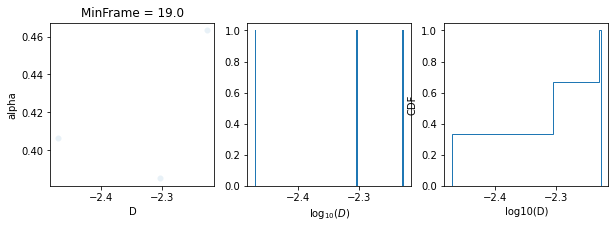

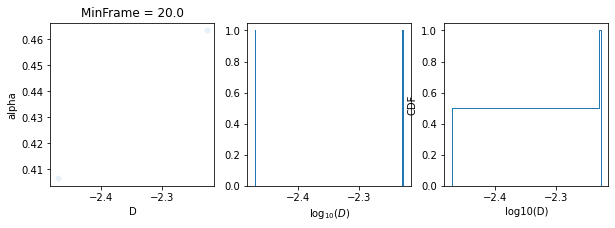

In [12]:
N = np.linspace(minframe,20,10)
for n in N:
    temp1 = df135[(df135['N']>n) & (df135['R2']>0.5)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=100)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

In [64]:
df135 = df135[(df135['N']>=8) & (df135['R2']>0.0)]

In [65]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import *

temp = df135[['alpha','D','c']].values
scaler = PowerTransformer()
scaler.fit(temp)
temp_scaled = scaler.transform(temp)

gmm = GaussianMixture(n_components=2,max_iter=2000,covariance_type='full',tol=1.0E-10,reg_covar=1.0E-10,init_params='random',n_init=500)
gmm.fit(temp_scaled)
proba_lists = gmm.predict_proba(temp_scaled)

colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
colorlist = [np.argmax(x) for x in colored_tuples]
df135['GM_Label']=colorlist

#Try to determine automatically the index for the confined group
index = [0,1,2]
D_per_group = []
for indx in index:
    Dmean = df135['D'][(df135['GM_Label']==indx)].mean()
    D_per_group.append(Dmean)

index_slow = D_per_group.index(min(D_per_group))
index_transported = D_per_group.index(max(D_per_group))
index_fast = list(filter(lambda x : x != index_slow and x != index_transported, index))[0]

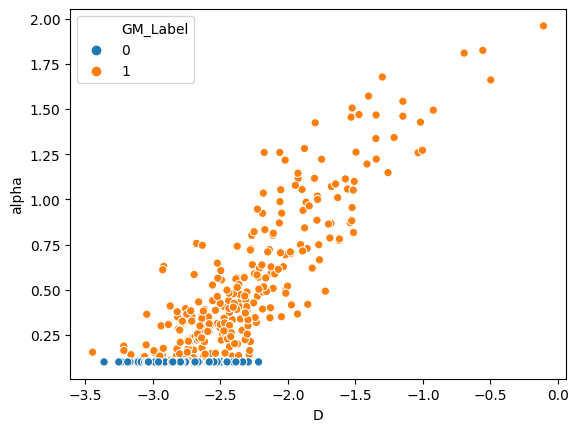

#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  271
Number of T-MSDs at time lag  0.1  =  271
Number of T-MSDs at time lag  0.15  =  271
Number of T-MSDs at time lag  0.2  =  271
Number of T-MSDs at time lag  0.25  =  271
Number of T-MSDs at time lag  0.3  =  271
Number of T-MSDs at time lag  0.35  =  271
Number of T-MSDs at time lag  0.4  =  181
Number of T-MSDs at time lag  0.45  =  123
Number of T-MSDs at time lag  0.5  =  75
Number of T-MSDs at time lag  0.55  =  54
Number of T-MSDs at time lag  0.6  =  38
Number of T-MSDs at time lag  0.65  =  24
Number of T-MSDs at time lag  0.7  =  18
Number of T-MSDs at time lag  0.75  =  14
Number of T-MSDs at time lag  0.8  =  11
Number of T-MSDs at time lag  0.85  =  11
Number of T-MSDs at time lag  0.9  =  8
Number of T-MSDs at time lag  0.95  =  7
Number of T-MSDs at ti

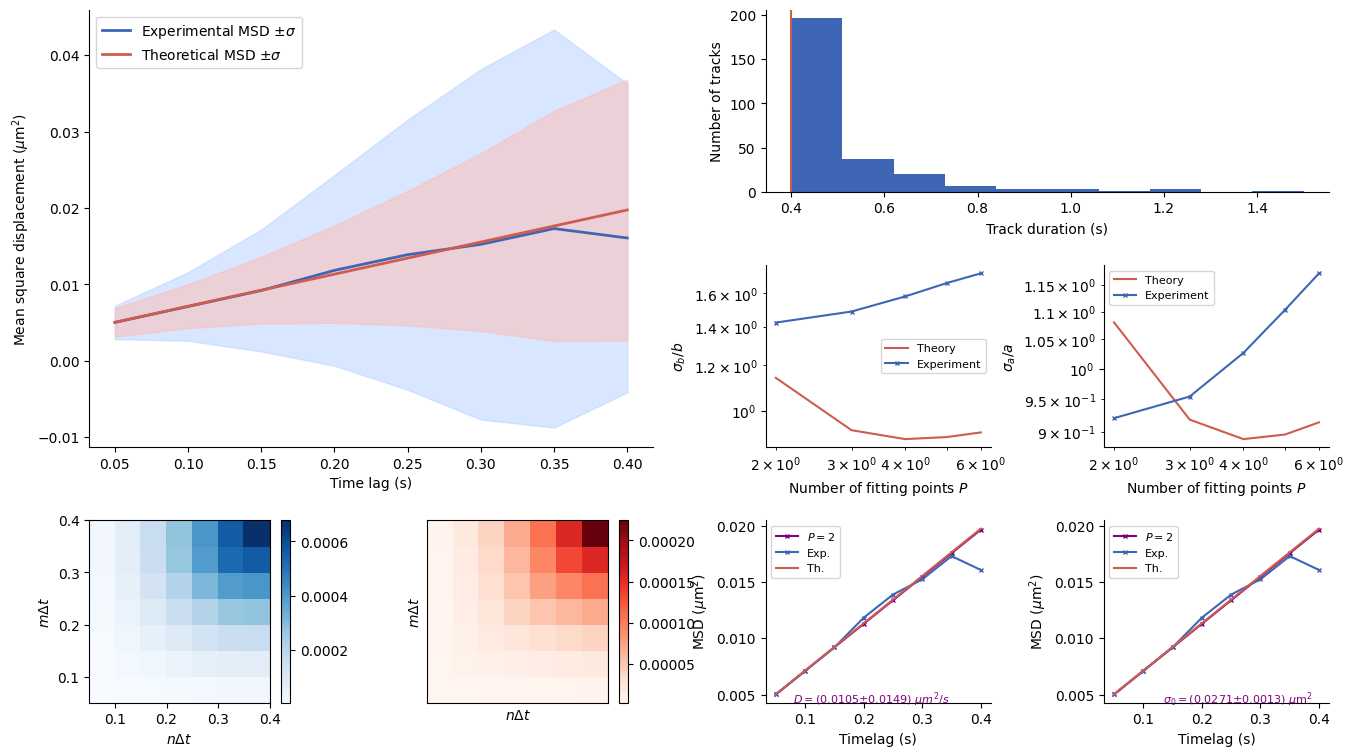

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0105, 0.0149, 0.0271, 0.0013)

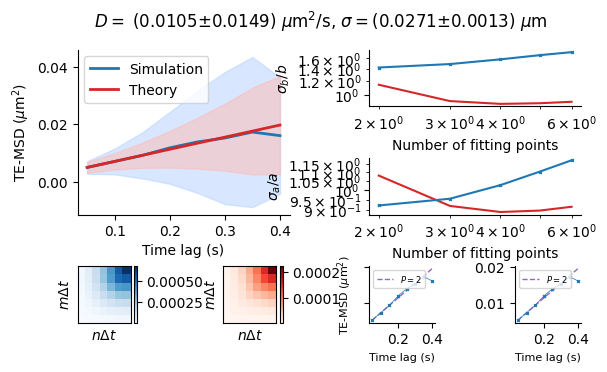

In [68]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='GM_Label',data=df135)
plt.show()

MSD = list(df135['MSD'][(df135['GM_Label']==index_transported)].values)
Michalet(MSD,cutoff=0.4)

# Identify the tracks in the dataset associated to the larger $R_S$

In [69]:
files = ["Data/SM1_WNT/tracks425.csv","Data/SM2_WNT/tracks425.csv","Data/SM3_WNT/tracks425.csv","Data/SM4_WNT/tracks425.csv","Data/SM5_WNT/tracks425.csv","Data/SM6_WNT/tracks425.csv","Data/SM7_WNT/tracks425.csv","Data/SM8_WNT/tracks425.csv","Data/SM10_WNT/tracks425.csv"]
df425 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=[2,6],display_id=True)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  8 , maxframe =  80 , R2 threshold =  -1000
Fit option:  [2, 6]
Reading filenames in  ['Data/SM1_WNT/tracks425.csv', 'Data/SM2_WNT/tracks425.csv', 'Data/SM3_WNT/tracks425.csv', 'Data/SM4_WNT/tracks425.csv', 'Data/SM5_WNT/tracks425.csv', 'Data/SM6_WNT/tracks425.csv', 'Data/SM7_WNT/tracks425.csv', 'Data/SM8_WNT/tracks425.csv', 'Data/SM10_WNT/tracks425.csv'] ...
Analysis for Data/SM1_WNT/tracks425.csv ...
Track 0 out of 194
Track 1 out of 194
Track 2 out of 194
Track 3 out of 194
Track 4 out of 194
Track 5 out of 194
Track 6 out of 194
Track 7 out of 194
Track 8 out of 194
Track 9 out of 194
Track 10 out of 194
Track 11 out of 194
Track 12 out of 194
Track 13 out of 194
Track 14 out of 194
Track 15 out of 194
Track 16 out of 194
Track 17 out of 194
Track 18 out of 194
Track 19 out of 194
Track 20 out of 194
Track 21 out of 194
Track 22 out of 194
Track 23 out of 194
Track 24 out of 194
Track 25 out of 194
Track 26 out

Track 184 out of 1369
Track 185 out of 1369
Track 186 out of 1369
Track 187 out of 1369
Track 188 out of 1369
Track 189 out of 1369
Track 190 out of 1369
Track 191 out of 1369
Track 192 out of 1369
Track 193 out of 1369
Track 194 out of 1369
Track 195 out of 1369
Track 196 out of 1369
Track 197 out of 1369
Track 198 out of 1369
Track 199 out of 1369
Track 200 out of 1369
Track 201 out of 1369
Track 202 out of 1369
Track 203 out of 1369
Track 204 out of 1369
Track 205 out of 1369
Track 206 out of 1369
Track 207 out of 1369
Track 208 out of 1369
Track 209 out of 1369
Track 210 out of 1369
Track 211 out of 1369
Track 212 out of 1369
Track 213 out of 1369
Track 214 out of 1369
Track 215 out of 1369
Track 216 out of 1369
Track 217 out of 1369
Track 218 out of 1369
Track 219 out of 1369
Track 220 out of 1369
Track 221 out of 1369
Track 222 out of 1369
Track 223 out of 1369
Track 224 out of 1369
Track 225 out of 1369
Track 226 out of 1369
Track 227 out of 1369
Track 228 out of 1369
Track 229 

Track 568 out of 1369
Track 569 out of 1369
Track 570 out of 1369
Track 571 out of 1369
Track 572 out of 1369
Track 573 out of 1369
Track 574 out of 1369
Track 575 out of 1369
Track 576 out of 1369
Track 577 out of 1369
Track 578 out of 1369
Track 579 out of 1369
Track 580 out of 1369
Track 581 out of 1369
Track 582 out of 1369
Track 583 out of 1369
Track 584 out of 1369
Track 585 out of 1369
Track 586 out of 1369
Track 587 out of 1369
Track 588 out of 1369
Track 589 out of 1369
Track 590 out of 1369
Track 591 out of 1369
Track 592 out of 1369
Track 593 out of 1369
Track 594 out of 1369
Track 595 out of 1369
Track 596 out of 1369
Track 597 out of 1369
Track 598 out of 1369
Track 599 out of 1369
Track 600 out of 1369
Track 601 out of 1369
Track 602 out of 1369
Track 603 out of 1369
Track 604 out of 1369
Track 605 out of 1369
Track 606 out of 1369
Track 607 out of 1369
Track 608 out of 1369
Track 609 out of 1369
Track 610 out of 1369
Track 611 out of 1369
Track 612 out of 1369
Track 613 

Track 956 out of 1369
Track 957 out of 1369
Track 958 out of 1369
Track 959 out of 1369
Track 960 out of 1369
Track 961 out of 1369
Track 962 out of 1369
Track 963 out of 1369
Track 964 out of 1369
Track 965 out of 1369
Track 966 out of 1369
Track 967 out of 1369
Track 968 out of 1369
Track 969 out of 1369
Track 970 out of 1369
Track 971 out of 1369
Track 972 out of 1369
Track 973 out of 1369
Track 974 out of 1369
Track 975 out of 1369
Track 976 out of 1369
Track 977 out of 1369
Track 978 out of 1369
Track 979 out of 1369
Track 980 out of 1369
Track 981 out of 1369
Track 982 out of 1369
Track 983 out of 1369
Track 984 out of 1369
Track 985 out of 1369
Track 986 out of 1369
Track 987 out of 1369
Track 988 out of 1369
Track 989 out of 1369
Track 990 out of 1369
Track 991 out of 1369
Track 992 out of 1369
Track 993 out of 1369
Track 994 out of 1369
Track 995 out of 1369
Track 996 out of 1369
Track 997 out of 1369
Track 998 out of 1369
Track 999 out of 1369
Track 1000 out of 1369
Track 100

Track 0 out of 1389
Track 1 out of 1389
Track 2 out of 1389
Track 3 out of 1389
Track 4 out of 1389
Track 5 out of 1389
Track 6 out of 1389
Track 7 out of 1389
Track 8 out of 1389
Track 9 out of 1389
Track 10 out of 1389
Track 11 out of 1389
Track 12 out of 1389
Track 13 out of 1389
Track 14 out of 1389
Track 15 out of 1389
Track 16 out of 1389
Track 17 out of 1389
Track 18 out of 1389
Track 19 out of 1389
Track 20 out of 1389
Track 21 out of 1389
Track 22 out of 1389
Track 23 out of 1389
Track 24 out of 1389
Track 25 out of 1389
Track 26 out of 1389
Track 27 out of 1389
Track 28 out of 1389
Track 29 out of 1389
Track 30 out of 1389
Track 31 out of 1389
Track 32 out of 1389
Track 33 out of 1389
Track 34 out of 1389
Track 35 out of 1389
Track 36 out of 1389
Track 37 out of 1389
Track 38 out of 1389
Track 39 out of 1389
Track 40 out of 1389
Track 41 out of 1389
Track 42 out of 1389
Track 43 out of 1389
Track 44 out of 1389
Track 45 out of 1389
Track 46 out of 1389
Track 47 out of 1389
Tr

Track 378 out of 1389
Track 379 out of 1389
Track 380 out of 1389
Track 381 out of 1389
Track 382 out of 1389
Track 383 out of 1389
Track 384 out of 1389
Track 385 out of 1389
Track 386 out of 1389
Track 387 out of 1389
Track 388 out of 1389
Track 389 out of 1389
Track 390 out of 1389
Track 391 out of 1389
Track 392 out of 1389
Track 393 out of 1389
Track 394 out of 1389
Track 395 out of 1389
Track 396 out of 1389
Track 397 out of 1389
Track 398 out of 1389
Track 399 out of 1389
Track 400 out of 1389
Track 401 out of 1389
Track 402 out of 1389
Track 403 out of 1389
Track 404 out of 1389
Track 405 out of 1389
Track 406 out of 1389
Track 407 out of 1389
Track 408 out of 1389
Track 409 out of 1389
Track 410 out of 1389
Track 411 out of 1389
Track 412 out of 1389
Track 413 out of 1389
Track 414 out of 1389
Track 415 out of 1389
Track 416 out of 1389
Track 417 out of 1389
Track 418 out of 1389
Track 419 out of 1389
Track 420 out of 1389
Track 421 out of 1389
Track 422 out of 1389
Track 423 

Track 820 out of 1389
Track 821 out of 1389
Track 822 out of 1389
Track 823 out of 1389
Track 824 out of 1389
Track 825 out of 1389
Track 826 out of 1389
Track 827 out of 1389
Track 828 out of 1389
Track 829 out of 1389
Track 830 out of 1389
Track 831 out of 1389
Track 832 out of 1389
Track 833 out of 1389
Track 834 out of 1389
Track 835 out of 1389
Track 836 out of 1389
Track 837 out of 1389
Track 838 out of 1389
Track 839 out of 1389
Track 840 out of 1389
Track 841 out of 1389
Track 842 out of 1389
Track 843 out of 1389
Track 844 out of 1389
Track 845 out of 1389
Track 846 out of 1389
Track 847 out of 1389
Track 848 out of 1389
Track 849 out of 1389
Track 850 out of 1389
Track 851 out of 1389
Track 852 out of 1389
Track 853 out of 1389
Track 854 out of 1389
Track 855 out of 1389
Track 856 out of 1389
Track 857 out of 1389
Track 858 out of 1389
Track 859 out of 1389
Track 860 out of 1389
Track 861 out of 1389
Track 862 out of 1389
Track 863 out of 1389
Track 864 out of 1389
Track 865 

Track 1287 out of 1389
Track 1288 out of 1389
Track 1289 out of 1389
Track 1290 out of 1389
Track 1291 out of 1389
Track 1292 out of 1389
Track 1293 out of 1389
Track 1294 out of 1389
Track 1295 out of 1389
Track 1296 out of 1389
Track 1297 out of 1389
Track 1298 out of 1389
Track 1299 out of 1389
Track 1300 out of 1389
Track 1301 out of 1389
Track 1302 out of 1389
Track 1303 out of 1389
Track 1304 out of 1389
Track 1305 out of 1389
Track 1306 out of 1389
Track 1307 out of 1389
Track 1308 out of 1389
Track 1309 out of 1389
Track 1310 out of 1389
Track 1311 out of 1389
Track 1312 out of 1389
Track 1313 out of 1389
Track 1314 out of 1389
Track 1315 out of 1389
Track 1316 out of 1389
Track 1317 out of 1389
Track 1318 out of 1389
Track 1319 out of 1389
Track 1320 out of 1389
Track 1321 out of 1389
Track 1322 out of 1389
Track 1323 out of 1389
Track 1324 out of 1389
Track 1325 out of 1389
Track 1326 out of 1389
Track 1327 out of 1389
Track 1328 out of 1389
Track 1329 out of 1389
Track 1330 

Track 291 out of 724
Track 292 out of 724
Track 293 out of 724
Track 294 out of 724
Track 295 out of 724
Track 296 out of 724
Track 297 out of 724
Track 298 out of 724
Track 299 out of 724
Track 300 out of 724
Track 301 out of 724
Track 302 out of 724
Track 303 out of 724
Track 304 out of 724
Track 305 out of 724
Track 306 out of 724
Track 307 out of 724
Track 308 out of 724
Track 309 out of 724
Track 310 out of 724
Track 311 out of 724
Track 312 out of 724
Track 313 out of 724
Track 314 out of 724
Track 315 out of 724
Track 316 out of 724
Track 317 out of 724
Track 318 out of 724
Track 319 out of 724
Track 320 out of 724
Track 321 out of 724
Track 322 out of 724
Track 323 out of 724
Track 324 out of 724
Track 325 out of 724
Track 326 out of 724
Track 327 out of 724
Track 328 out of 724
Track 329 out of 724
Track 330 out of 724
Track 331 out of 724
Track 332 out of 724
Track 333 out of 724
Track 334 out of 724
Track 335 out of 724
Track 336 out of 724
Track 337 out of 724
Track 338 out

Track 16 out of 1267
Track 17 out of 1267
Track 18 out of 1267
Track 19 out of 1267
Track 20 out of 1267
Track 21 out of 1267
Track 22 out of 1267
Track 23 out of 1267
Track 24 out of 1267
Track 25 out of 1267
Track 26 out of 1267
Track 27 out of 1267
Track 28 out of 1267
Track 29 out of 1267
Track 30 out of 1267
Track 31 out of 1267
Track 32 out of 1267
Track 33 out of 1267
Track 34 out of 1267
Track 35 out of 1267
Track 36 out of 1267
Track 37 out of 1267
Track 38 out of 1267
Track 39 out of 1267
Track 40 out of 1267
Track 41 out of 1267
Track 42 out of 1267
Track 43 out of 1267
Track 44 out of 1267
Track 45 out of 1267
Track 46 out of 1267
Track 47 out of 1267
Track 48 out of 1267
Track 49 out of 1267
Track 50 out of 1267
Track 51 out of 1267
Track 52 out of 1267
Track 53 out of 1267
Track 54 out of 1267
Track 55 out of 1267
Track 56 out of 1267
Track 57 out of 1267
Track 58 out of 1267
Track 59 out of 1267
Track 60 out of 1267
Track 61 out of 1267
Track 62 out of 1267
Track 63 out 

Track 457 out of 1267
Track 458 out of 1267
Track 459 out of 1267
Track 460 out of 1267
Track 461 out of 1267
Track 462 out of 1267
Track 463 out of 1267
Track 464 out of 1267
Track 465 out of 1267
Track 466 out of 1267
Track 467 out of 1267
Track 468 out of 1267
Track 469 out of 1267
Track 470 out of 1267
Track 471 out of 1267
Track 472 out of 1267
Track 473 out of 1267
Track 474 out of 1267
Track 475 out of 1267
Track 476 out of 1267
Track 477 out of 1267
Track 478 out of 1267
Track 479 out of 1267
Track 480 out of 1267
Track 481 out of 1267
Track 482 out of 1267
Track 483 out of 1267
Track 484 out of 1267
Track 485 out of 1267
Track 486 out of 1267
Track 487 out of 1267
Track 488 out of 1267
Track 489 out of 1267
Track 490 out of 1267
Track 491 out of 1267
Track 492 out of 1267
Track 493 out of 1267
Track 494 out of 1267
Track 495 out of 1267
Track 496 out of 1267
Track 497 out of 1267
Track 498 out of 1267
Track 499 out of 1267
Track 500 out of 1267
Track 501 out of 1267
Track 502 

Track 874 out of 1267
Track 875 out of 1267
Track 876 out of 1267
Track 877 out of 1267
Track 878 out of 1267
Track 879 out of 1267
Track 880 out of 1267
Track 881 out of 1267
Track 882 out of 1267
Track 883 out of 1267
Track 884 out of 1267
Track 885 out of 1267
Track 886 out of 1267
Track 887 out of 1267
Track 888 out of 1267
Track 889 out of 1267
Track 890 out of 1267
Track 891 out of 1267
Track 892 out of 1267
Track 893 out of 1267
Track 894 out of 1267
Track 895 out of 1267
Track 896 out of 1267
Track 897 out of 1267
Track 898 out of 1267
Track 899 out of 1267
Track 900 out of 1267
Track 901 out of 1267
Track 902 out of 1267
Track 903 out of 1267
Track 904 out of 1267
Track 905 out of 1267
Track 906 out of 1267
Track 907 out of 1267
Track 908 out of 1267
Track 909 out of 1267
Track 910 out of 1267
Track 911 out of 1267
Track 912 out of 1267
Track 913 out of 1267
Track 914 out of 1267
Track 915 out of 1267
Track 916 out of 1267
Track 917 out of 1267
Track 918 out of 1267
Track 919 

Track 1257 out of 1267
Track 1258 out of 1267
Track 1259 out of 1267
Track 1260 out of 1267
Track 1261 out of 1267
Track 1262 out of 1267
Track 1263 out of 1267
Track 1264 out of 1267
Track 1265 out of 1267
Track 1266 out of 1267
389  tracks were kept out of  10045 . Done.
Analysis for Data/SM6_WNT/tracks425.csv ...
Track 0 out of 2176
Track 1 out of 2176
Track 2 out of 2176
Track 3 out of 2176
Track 4 out of 2176
Track 5 out of 2176
Track 6 out of 2176
Track 7 out of 2176
Track 8 out of 2176
Track 9 out of 2176
Track 10 out of 2176
Track 11 out of 2176
Track 12 out of 2176
Track 13 out of 2176
Track 14 out of 2176
Track 15 out of 2176
Track 16 out of 2176
Track 17 out of 2176
Track 18 out of 2176
Track 19 out of 2176
Track 20 out of 2176
Track 21 out of 2176
Track 22 out of 2176
Track 23 out of 2176
Track 24 out of 2176
Track 25 out of 2176
Track 26 out of 2176
Track 27 out of 2176
Track 28 out of 2176
Track 29 out of 2176
Track 30 out of 2176
Track 31 out of 2176
Track 32 out of 2176

Track 416 out of 2176
Track 417 out of 2176
Track 418 out of 2176
Track 419 out of 2176
Track 420 out of 2176
Track 421 out of 2176
Track 422 out of 2176
Track 423 out of 2176
Track 424 out of 2176
Track 425 out of 2176
Track 426 out of 2176
Track 427 out of 2176
Track 428 out of 2176
Track 429 out of 2176
Track 430 out of 2176
Track 431 out of 2176
Track 432 out of 2176
Track 433 out of 2176
Track 434 out of 2176
Track 435 out of 2176
Track 436 out of 2176
Track 437 out of 2176
Track 438 out of 2176
Track 439 out of 2176
Track 440 out of 2176
Track 441 out of 2176
Track 442 out of 2176
Track 443 out of 2176
Track 444 out of 2176
Track 445 out of 2176
Track 446 out of 2176
Track 447 out of 2176
Track 448 out of 2176
Track 449 out of 2176
Track 450 out of 2176
Track 451 out of 2176
Track 452 out of 2176
Track 453 out of 2176
Track 454 out of 2176
Track 455 out of 2176
Track 456 out of 2176
Track 457 out of 2176
Track 458 out of 2176
Track 459 out of 2176
Track 460 out of 2176
Track 461 

Track 876 out of 2176
Track 877 out of 2176
Track 878 out of 2176
Track 879 out of 2176
Track 880 out of 2176
Track 881 out of 2176
Track 882 out of 2176
Track 883 out of 2176
Track 884 out of 2176
Track 885 out of 2176
Track 886 out of 2176
Track 887 out of 2176
Track 888 out of 2176
Track 889 out of 2176
Track 890 out of 2176
Track 891 out of 2176
Track 892 out of 2176
Track 893 out of 2176
Track 894 out of 2176
Track 895 out of 2176
Track 896 out of 2176
Track 897 out of 2176
Track 898 out of 2176
Track 899 out of 2176
Track 900 out of 2176
Track 901 out of 2176
Track 902 out of 2176
Track 903 out of 2176
Track 904 out of 2176
Track 905 out of 2176
Track 906 out of 2176
Track 907 out of 2176
Track 908 out of 2176
Track 909 out of 2176
Track 910 out of 2176
Track 911 out of 2176
Track 912 out of 2176
Track 913 out of 2176
Track 914 out of 2176
Track 915 out of 2176
Track 916 out of 2176
Track 917 out of 2176
Track 918 out of 2176
Track 919 out of 2176
Track 920 out of 2176
Track 921 

Track 1243 out of 2176
Track 1244 out of 2176
Track 1245 out of 2176
Track 1246 out of 2176
Track 1247 out of 2176
Track 1248 out of 2176
Track 1249 out of 2176
Track 1250 out of 2176
Track 1251 out of 2176
Track 1252 out of 2176
Track 1253 out of 2176
Track 1254 out of 2176
Track 1255 out of 2176
Track 1256 out of 2176
Track 1257 out of 2176
Track 1258 out of 2176
Track 1259 out of 2176
Track 1260 out of 2176
Track 1261 out of 2176
Track 1262 out of 2176
Track 1263 out of 2176
Track 1264 out of 2176
Track 1265 out of 2176
Track 1266 out of 2176
Track 1267 out of 2176
Track 1268 out of 2176
Track 1269 out of 2176
Track 1270 out of 2176
Track 1271 out of 2176
Track 1272 out of 2176
Track 1273 out of 2176
Track 1274 out of 2176
Track 1275 out of 2176
Track 1276 out of 2176
Track 1277 out of 2176
Track 1278 out of 2176
Track 1279 out of 2176
Track 1280 out of 2176
Track 1281 out of 2176
Track 1282 out of 2176
Track 1283 out of 2176
Track 1284 out of 2176
Track 1285 out of 2176
Track 1286 

Track 1612 out of 2176
Track 1613 out of 2176
Track 1614 out of 2176
Track 1615 out of 2176
Track 1616 out of 2176
Track 1617 out of 2176
Track 1618 out of 2176
Track 1619 out of 2176
Track 1620 out of 2176
Track 1621 out of 2176
Track 1622 out of 2176
Track 1623 out of 2176
Track 1624 out of 2176
Track 1625 out of 2176
Track 1626 out of 2176
Track 1627 out of 2176
Track 1628 out of 2176
Track 1629 out of 2176
Track 1630 out of 2176
Track 1631 out of 2176
Track 1632 out of 2176
Track 1633 out of 2176
Track 1634 out of 2176
Track 1635 out of 2176
Track 1636 out of 2176
Track 1637 out of 2176
Track 1638 out of 2176
Track 1639 out of 2176
Track 1640 out of 2176
Track 1641 out of 2176
Track 1642 out of 2176
Track 1643 out of 2176
Track 1644 out of 2176
Track 1645 out of 2176
Track 1646 out of 2176
Track 1647 out of 2176
Track 1648 out of 2176
Track 1649 out of 2176
Track 1650 out of 2176
Track 1651 out of 2176
Track 1652 out of 2176
Track 1653 out of 2176
Track 1654 out of 2176
Track 1655 

Track 2059 out of 2176
Track 2060 out of 2176
Track 2061 out of 2176
Track 2062 out of 2176
Track 2063 out of 2176
Track 2064 out of 2176
Track 2065 out of 2176
Track 2066 out of 2176
Track 2067 out of 2176
Track 2068 out of 2176
Track 2069 out of 2176
Track 2070 out of 2176
Track 2071 out of 2176
Track 2072 out of 2176
Track 2073 out of 2176
Track 2074 out of 2176
Track 2075 out of 2176
Track 2076 out of 2176
Track 2077 out of 2176
Track 2078 out of 2176
Track 2079 out of 2176
Track 2080 out of 2176
Track 2081 out of 2176
Track 2082 out of 2176
Track 2083 out of 2176
Track 2084 out of 2176
Track 2085 out of 2176
Track 2086 out of 2176
Track 2087 out of 2176
Track 2088 out of 2176
Track 2089 out of 2176
Track 2090 out of 2176
Track 2091 out of 2176
Track 2092 out of 2176
Track 2093 out of 2176
Track 2094 out of 2176
Track 2095 out of 2176
Track 2096 out of 2176
Track 2097 out of 2176
Track 2098 out of 2176
Track 2099 out of 2176
Track 2100 out of 2176
Track 2101 out of 2176
Track 2102 

Track 284 out of 1289
Track 285 out of 1289
Track 286 out of 1289
Track 287 out of 1289
Track 288 out of 1289
Track 289 out of 1289
Track 290 out of 1289
Track 291 out of 1289
Track 292 out of 1289
Track 293 out of 1289
Track 294 out of 1289
Track 295 out of 1289
Track 296 out of 1289
Track 297 out of 1289
Track 298 out of 1289
Track 299 out of 1289
Track 300 out of 1289
Track 301 out of 1289
Track 302 out of 1289
Track 303 out of 1289
Track 304 out of 1289
Track 305 out of 1289
Track 306 out of 1289
Track 307 out of 1289
Track 308 out of 1289
Track 309 out of 1289
Track 310 out of 1289
Track 311 out of 1289
Track 312 out of 1289
Track 313 out of 1289
Track 314 out of 1289
Track 315 out of 1289
Track 316 out of 1289
Track 317 out of 1289
Track 318 out of 1289
Track 319 out of 1289
Track 320 out of 1289
Track 321 out of 1289
Track 322 out of 1289
Track 323 out of 1289
Track 324 out of 1289
Track 325 out of 1289
Track 326 out of 1289
Track 327 out of 1289
Track 328 out of 1289
Track 329 

Track 668 out of 1289
Track 669 out of 1289
Track 670 out of 1289
Track 671 out of 1289
Track 672 out of 1289
Track 673 out of 1289
Track 674 out of 1289
Track 675 out of 1289
Track 676 out of 1289
Track 677 out of 1289
Track 678 out of 1289
Track 679 out of 1289
Track 680 out of 1289
Track 681 out of 1289
Track 682 out of 1289
Track 683 out of 1289
Track 684 out of 1289
Track 685 out of 1289
Track 686 out of 1289
Track 687 out of 1289
Track 688 out of 1289
Track 689 out of 1289
Track 690 out of 1289
Track 691 out of 1289
Track 692 out of 1289
Track 693 out of 1289
Track 694 out of 1289
Track 695 out of 1289
Track 696 out of 1289
Track 697 out of 1289
Track 698 out of 1289
Track 699 out of 1289
Track 700 out of 1289
Track 701 out of 1289
Track 702 out of 1289
Track 703 out of 1289
Track 704 out of 1289
Track 705 out of 1289
Track 706 out of 1289
Track 707 out of 1289
Track 708 out of 1289
Track 709 out of 1289
Track 710 out of 1289
Track 711 out of 1289
Track 712 out of 1289
Track 713 

Track 1067 out of 1289
Track 1068 out of 1289
Track 1069 out of 1289
Track 1070 out of 1289
Track 1071 out of 1289
Track 1072 out of 1289
Track 1073 out of 1289
Track 1074 out of 1289
Track 1075 out of 1289
Track 1076 out of 1289
Track 1077 out of 1289
Track 1078 out of 1289
Track 1079 out of 1289
Track 1080 out of 1289
Track 1081 out of 1289
Track 1082 out of 1289
Track 1083 out of 1289
Track 1084 out of 1289
Track 1085 out of 1289
Track 1086 out of 1289
Track 1087 out of 1289
Track 1088 out of 1289
Track 1089 out of 1289
Track 1090 out of 1289
Track 1091 out of 1289
Track 1092 out of 1289
Track 1093 out of 1289
Track 1094 out of 1289
Track 1095 out of 1289
Track 1096 out of 1289
Track 1097 out of 1289
Track 1098 out of 1289
Track 1099 out of 1289
Track 1100 out of 1289
Track 1101 out of 1289
Track 1102 out of 1289
Track 1103 out of 1289
Track 1104 out of 1289
Track 1105 out of 1289
Track 1106 out of 1289
Track 1107 out of 1289
Track 1108 out of 1289
Track 1109 out of 1289
Track 1110 

Track 162 out of 1552
Track 163 out of 1552
Track 164 out of 1552
Track 165 out of 1552
Track 166 out of 1552
Track 167 out of 1552
Track 168 out of 1552
Track 169 out of 1552
Track 170 out of 1552
Track 171 out of 1552
Track 172 out of 1552
Track 173 out of 1552
Track 174 out of 1552
Track 175 out of 1552
Track 176 out of 1552
Track 177 out of 1552
Track 178 out of 1552
Track 179 out of 1552
Track 180 out of 1552
Track 181 out of 1552
Track 182 out of 1552
Track 183 out of 1552
Track 184 out of 1552
Track 185 out of 1552
Track 186 out of 1552
Track 187 out of 1552
Track 188 out of 1552
Track 189 out of 1552
Track 190 out of 1552
Track 191 out of 1552
Track 192 out of 1552
Track 193 out of 1552
Track 194 out of 1552
Track 195 out of 1552
Track 196 out of 1552
Track 197 out of 1552
Track 198 out of 1552
Track 199 out of 1552
Track 200 out of 1552
Track 201 out of 1552
Track 202 out of 1552
Track 203 out of 1552
Track 204 out of 1552
Track 205 out of 1552
Track 206 out of 1552
Track 207 

Track 558 out of 1552
Track 559 out of 1552
Track 560 out of 1552
Track 561 out of 1552
Track 562 out of 1552
Track 563 out of 1552
Track 564 out of 1552
Track 565 out of 1552
Track 566 out of 1552
Track 567 out of 1552
Track 568 out of 1552
Track 569 out of 1552
Track 570 out of 1552
Track 571 out of 1552
Track 572 out of 1552
Track 573 out of 1552
Track 574 out of 1552
Track 575 out of 1552
Track 576 out of 1552
Track 577 out of 1552
Track 578 out of 1552
Track 579 out of 1552
Track 580 out of 1552
Track 581 out of 1552
Track 582 out of 1552
Track 583 out of 1552
Track 584 out of 1552
Track 585 out of 1552
Track 586 out of 1552
Track 587 out of 1552
Track 588 out of 1552
Track 589 out of 1552
Track 590 out of 1552
Track 591 out of 1552
Track 592 out of 1552
Track 593 out of 1552
Track 594 out of 1552
Track 595 out of 1552
Track 596 out of 1552
Track 597 out of 1552
Track 598 out of 1552
Track 599 out of 1552
Track 600 out of 1552
Track 601 out of 1552
Track 602 out of 1552
Track 603 

Track 972 out of 1552
Track 973 out of 1552
Track 974 out of 1552
Track 975 out of 1552
Track 976 out of 1552
Track 977 out of 1552
Track 978 out of 1552
Track 979 out of 1552
Track 980 out of 1552
Track 981 out of 1552
Track 982 out of 1552
Track 983 out of 1552
Track 984 out of 1552
Track 985 out of 1552
Track 986 out of 1552
Track 987 out of 1552
Track 988 out of 1552
Track 989 out of 1552
Track 990 out of 1552
Track 991 out of 1552
Track 992 out of 1552
Track 993 out of 1552
Track 994 out of 1552
Track 995 out of 1552
Track 996 out of 1552
Track 997 out of 1552
Track 998 out of 1552
Track 999 out of 1552
Track 1000 out of 1552
Track 1001 out of 1552
Track 1002 out of 1552
Track 1003 out of 1552
Track 1004 out of 1552
Track 1005 out of 1552
Track 1006 out of 1552
Track 1007 out of 1552
Track 1008 out of 1552
Track 1009 out of 1552
Track 1010 out of 1552
Track 1011 out of 1552
Track 1012 out of 1552
Track 1013 out of 1552
Track 1014 out of 1552
Track 1015 out of 1552
Track 1016 out o

Track 1397 out of 1552
Track 1398 out of 1552
Track 1399 out of 1552
Track 1400 out of 1552
Track 1401 out of 1552
Track 1402 out of 1552
Track 1403 out of 1552
Track 1404 out of 1552
Track 1405 out of 1552
Track 1406 out of 1552
Track 1407 out of 1552
Track 1408 out of 1552
Track 1409 out of 1552
Track 1410 out of 1552
Track 1411 out of 1552
Track 1412 out of 1552
Track 1413 out of 1552
Track 1414 out of 1552
Track 1415 out of 1552
Track 1416 out of 1552
Track 1417 out of 1552
Track 1418 out of 1552
Track 1419 out of 1552
Track 1420 out of 1552
Track 1421 out of 1552
Track 1422 out of 1552
Track 1423 out of 1552
Track 1424 out of 1552
Track 1425 out of 1552
Track 1426 out of 1552
Track 1427 out of 1552
Track 1428 out of 1552
Track 1429 out of 1552
Track 1430 out of 1552
Track 1431 out of 1552
Track 1432 out of 1552
Track 1433 out of 1552
Track 1434 out of 1552
Track 1435 out of 1552
Track 1436 out of 1552
Track 1437 out of 1552
Track 1438 out of 1552
Track 1439 out of 1552
Track 1440 

96  tracks were kept out of  3186 . Done.
Generating a DataFrame...
End of the program. Returning DataFrame.


In [70]:
def radius(xlist,ylist):
    rad=[]
    for x,y in zip(xlist,ylist):
        r=[]
        for i in range(len(x)):
            xx = x[i]
            yy = y[i]
            r.append(np.sqrt(xx**2+yy**2))
        rad.append(r)
    return(rad)

X425 = list(df425['x'].values)
Y425 = list(df425['y'].values)
R425 = radius(X425,Y425)

X135 = list(df135['x'].values)
Y135 = list(df135['y'].values)
R135 = radius(X135,Y135)


label135 = list(df135['GM_Label'].values)
label425 = ['nan' for k in range(len(X425))]

def is_proper_subset(set, superset):
     return all(x in superset for x in set) and len(set)<=len(superset)
    
sum0 = 0   
for i in range(len(R135)):
    for j in range(len(R425)):
        test = is_proper_subset(R135[i],R425[j])
        if test==True:
            if label135[i]==index_slow:
                label425[j] = 'slow_pop'
            elif label135[i]==index_transported:
                label425[j] = 'transport'
            elif label135[i]==index_fast:
                label425[j] = 'fast_pop'
            sum0+=1
            
print(len(label135),sum0)
dflabel = df425
dflabel['Label']=label425
display(dflabel)

397 390


,alpha,D,c,R2,N,x,y,MSD,Filename,Label
0,0.483277,-1.608227,0.412907,0.681178,8,"[34.010999999999996, 34.074, 34.02599999999999...","[7.242999999999999, 7.331, 7.462000000000001, ...","[0.012480571428571697, 0.022569666666667116, 0...",Data/SM1_WNT/tracks425.csv,nan
1,0.100000,-1.733917,0.174043,-0.152360,10,"[35.501999999999995, 35.72, 35.875, 35.872, 35...","[8.663, 8.826, 8.789, 8.788, 8.863, 8.92799999...","[0.042336111111110755, 0.08775887499999972, 0....",Data/SM1_WNT/tracks425.csv,nan
2,0.125920,-3.159129,0.175973,-1.555438,9,"[42.052, 42.098, 42.068999999999996, 42.114, 4...","[15.998, 15.963, 15.943, 15.924000000000001, 1...","[0.002303624999999937, 0.0019335714285713481, ...",Data/SM1_WNT/tracks425.csv,nan
3,0.693581,-1.932254,0.200000,0.595661,13,"[66.633, 66.633, 66.633, 66.633, 66.766, 66.5,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.013266750000000691, 0.009648545454545843, 0...",Data/SM1_WNT/tracks425.csv,nan
4,0.100000,-2.483694,0.094095,0.320356,11,"[34.571999999999996, 34.645, 34.66, 34.629, 34...","[8.141, 8.181000000000001, 8.184, 8.14, 8.237,...","[0.006379500000000109, 0.010070000000000119, 0...",Data/SM1_WNT/tracks425.csv,nan
...,...,...,...,...,...,...,...,...,...,...
2959,0.100000,-2.767368,0.195579,0.118648,13,"[35.951, 35.949, 35.903, 35.959, 35.9740000000...","[63.81100000000001, 63.836999999999996, 63.821...","[0.005679166666666706, 0.005092272727273012, 0...",Data/SM10_WNT/tracks425.csv,nan
2960,0.557809,-2.734455,0.162911,-0.910490,11,"[32.19, 32.22, 32.25, 32.24, 32.221, 32.236999...","[57.523, 57.445, 57.566, 57.553999999999995, 5...","[0.0031826000000001542, 0.003013888888888802, ...",Data/SM10_WNT/tracks425.csv,nan
2961,0.100000,-2.737245,0.147189,-0.276931,9,"[35.999, 35.924, 35.914, 35.917, 35.911, 35.96...","[63.806000000000004, 63.845, 63.835, 63.755, 6...","[0.006591625000000283, 0.006854571428571458, 0...",Data/SM10_WNT/tracks425.csv,nan
2962,1.621574,-1.617573,0.149369,-6.951659,8,"[28.34, 28.267, 28.451999999999998, 28.377, 28...","[48.913999999999994, 48.891999999999996, 48.92...","[0.008258571428571343, 0.006639833333333364, 0...",Data/SM10_WNT/tracks425.csv,nan


# Save in `data_done` the tracks that have been classified and remove them from the dataset `data_stripped` in order to classify the other tracks now

In [71]:
data_done = dflabel[(dflabel['Label'] != 'nan')].copy()
index = dflabel[(dflabel['Label'] != 'nan')].index
temp = dflabel.copy()
data_stripped = temp.drop(index)

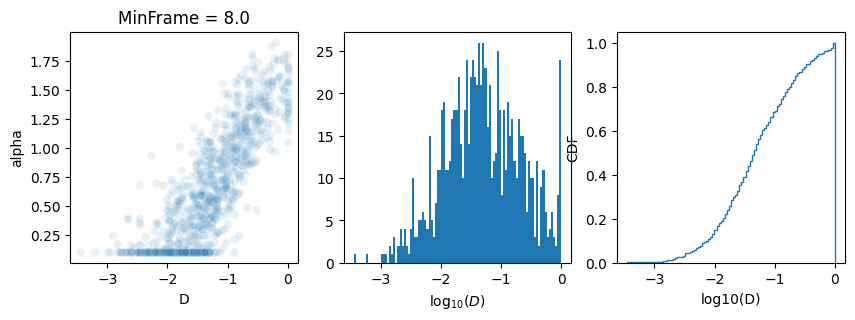

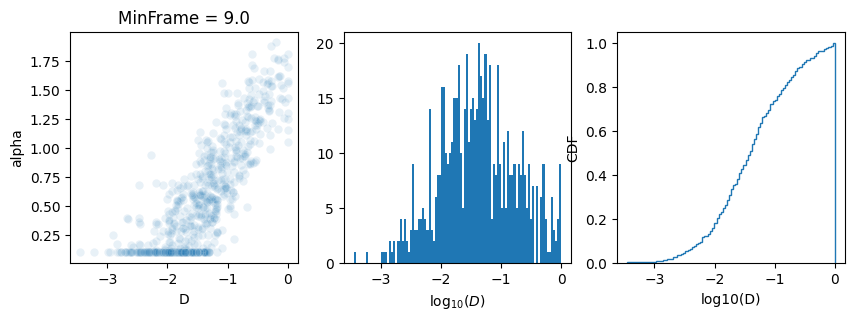

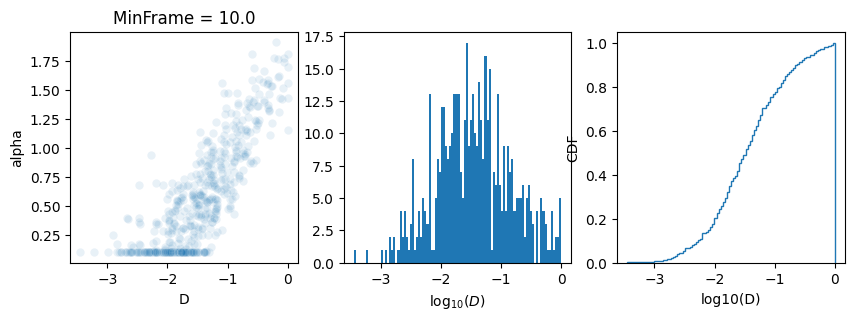

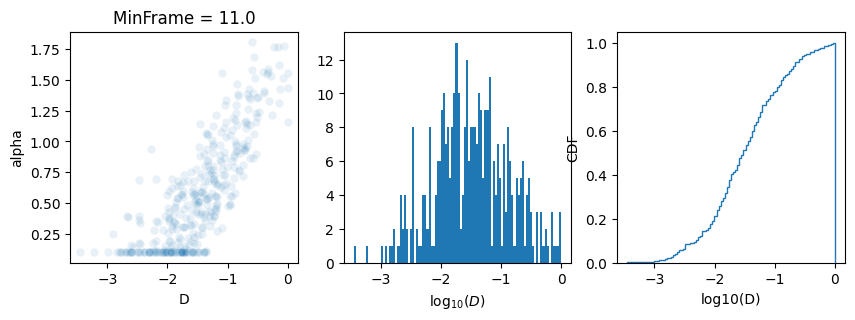

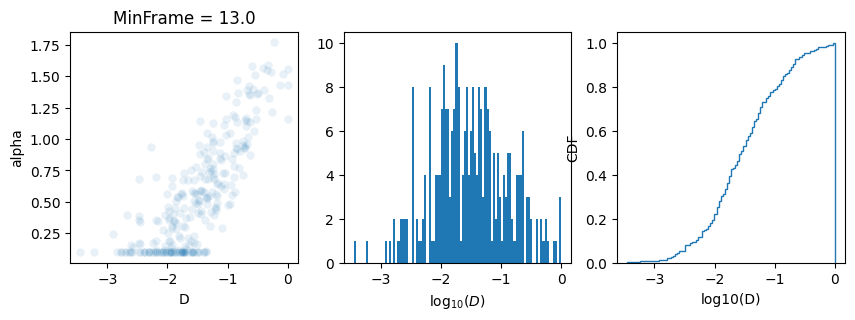

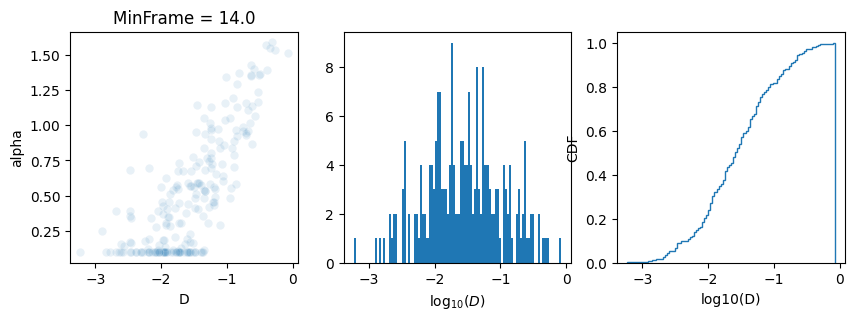

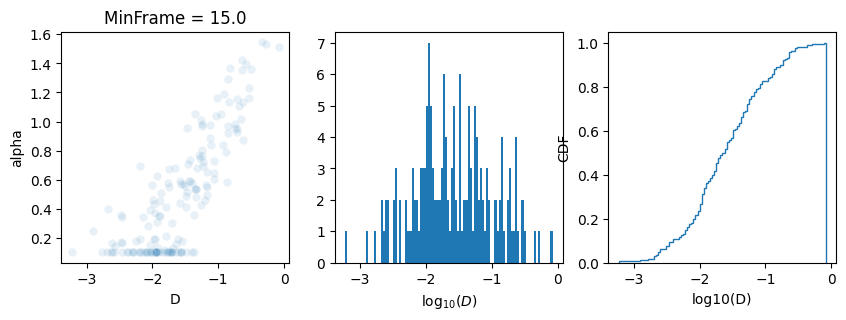

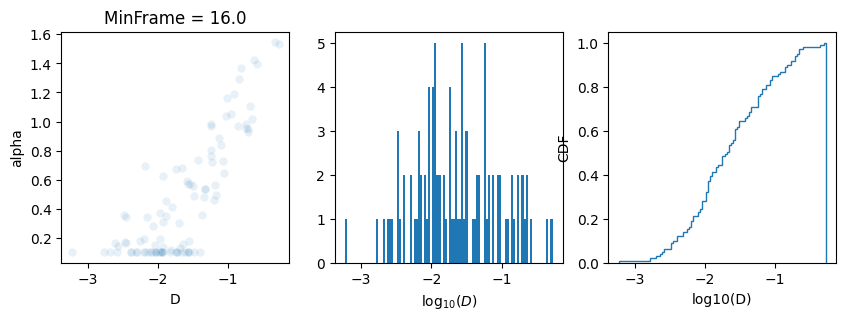

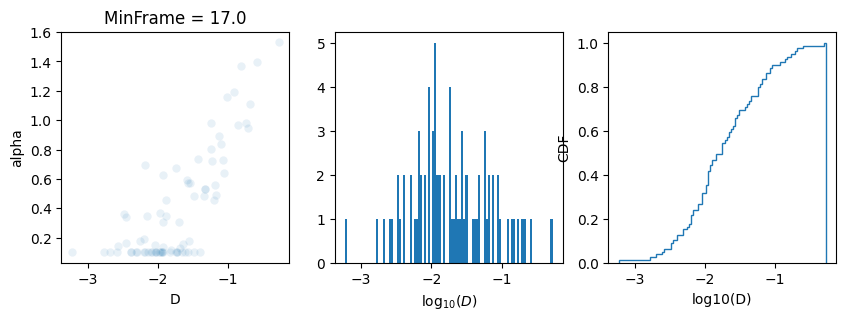

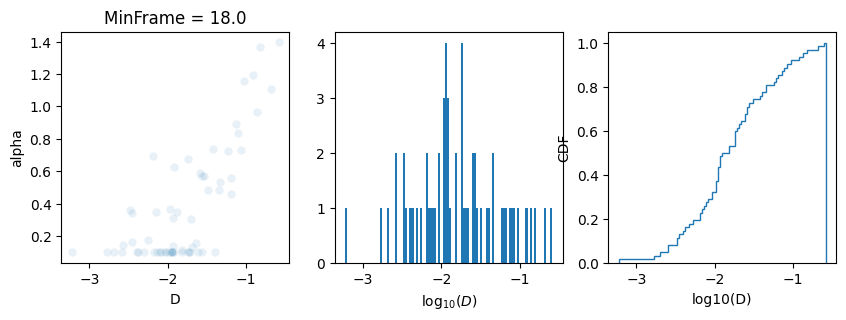

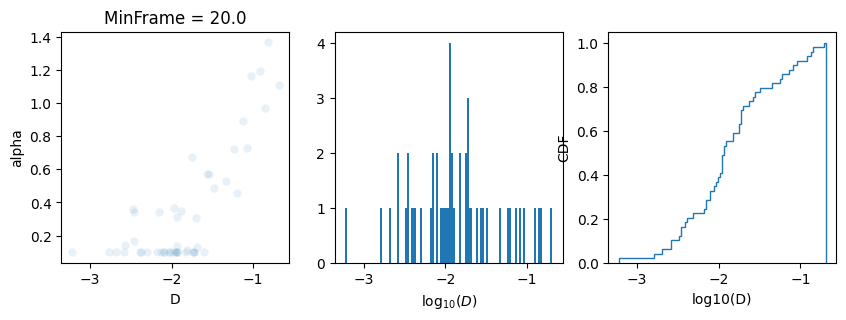

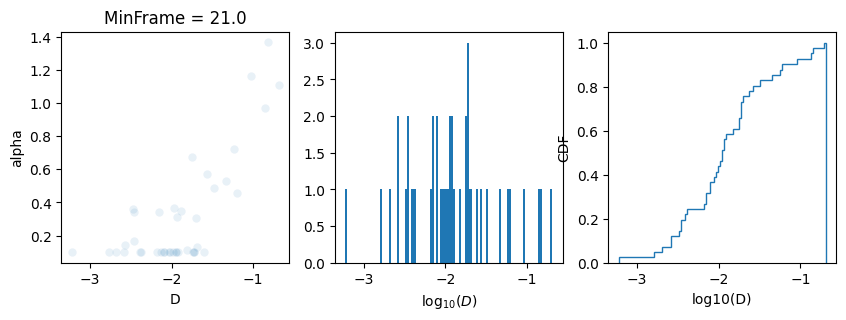

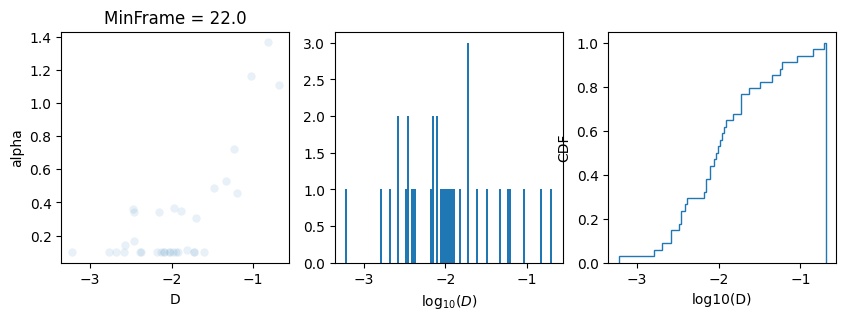

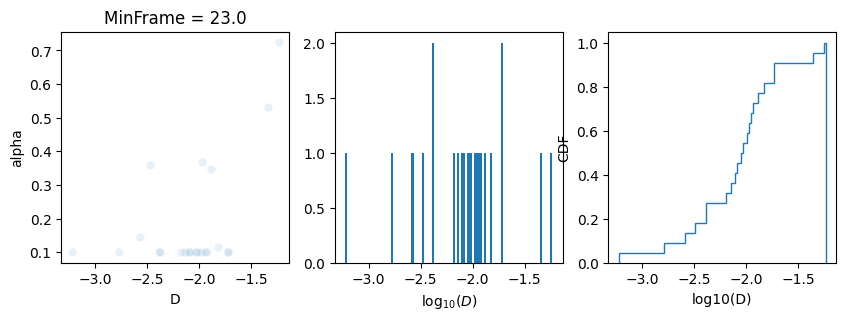

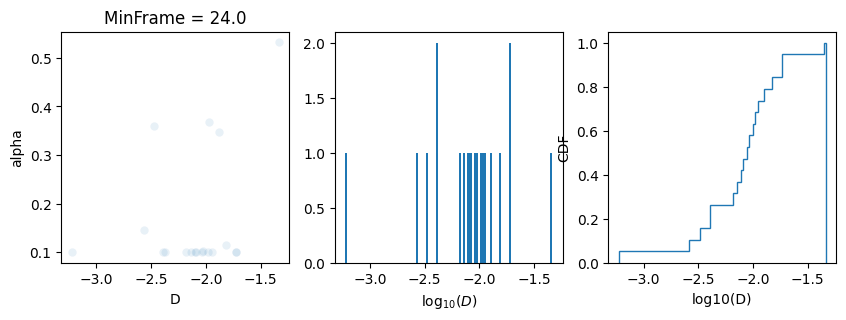

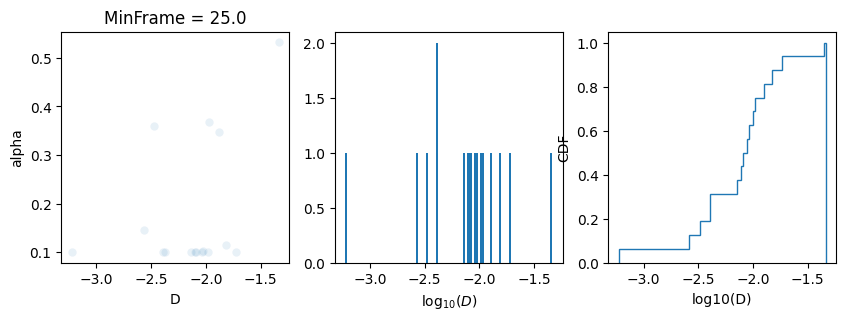

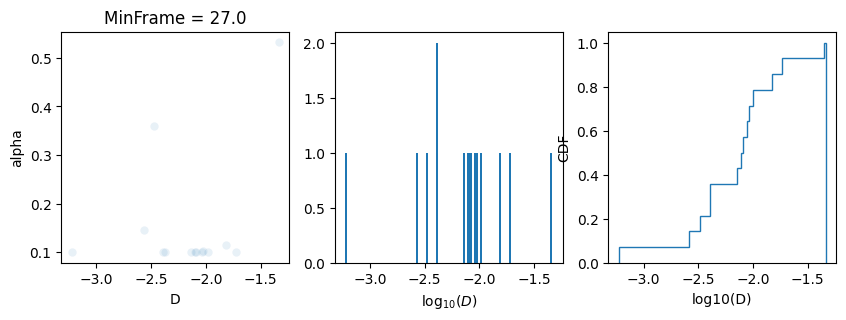

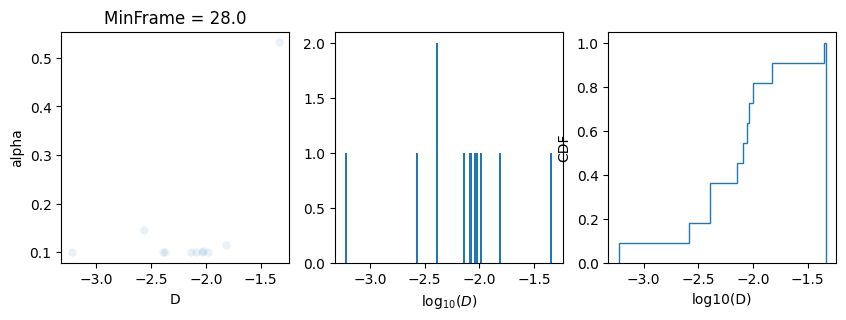

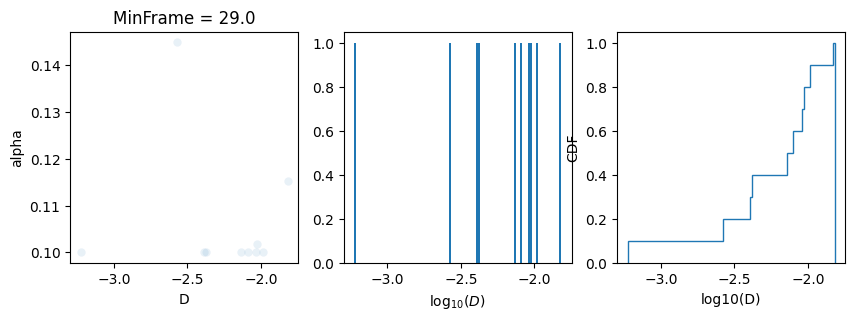

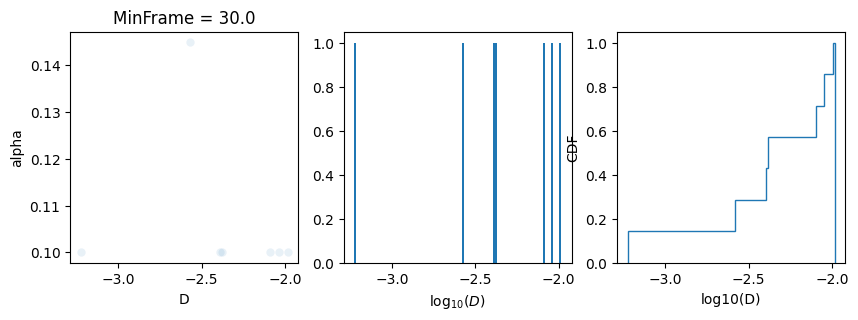

In [72]:
N = np.linspace(minframe,30,20)
for n in N:
    temp1 = data_stripped[(data_stripped['N']>n) & (data_stripped['R2']>0)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=100)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

In [73]:
data_stripped = data_stripped[(data_stripped['N']>=11) & (data_stripped['R2']>0)]

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import *

temp = data_stripped[['c','alpha','D']].values
scaler = PowerTransformer()
scaler.fit(temp)
temp_scaled = scaler.transform(temp)

gmm = GaussianMixture(n_components=4,max_iter=500,covariance_type='full',tol=1.0E-10,reg_covar=1.0E-10,init_params='random',n_init=500)
gmm.fit(temp_scaled)
proba_lists = gmm.predict_proba(temp_scaled)

colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
colorlist = [np.argmax(x) for x in colored_tuples]
data_stripped['GM_Label']=colorlist

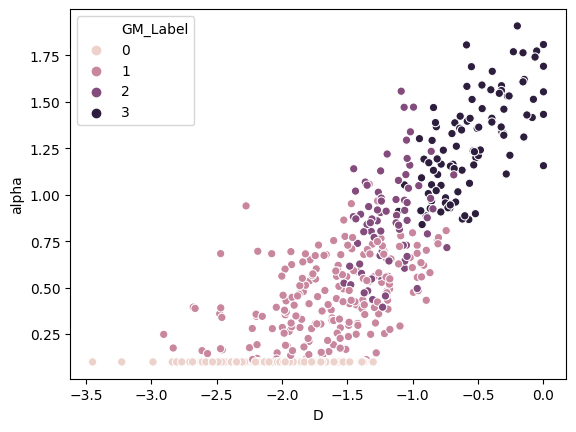

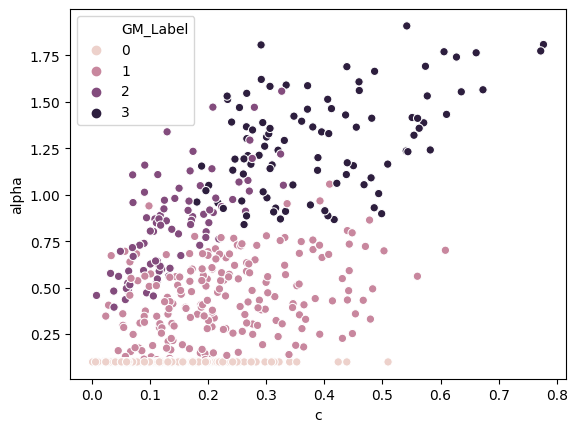

In [74]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='GM_Label',data=data_stripped)
plt.show()

sns.scatterplot(x='c',y='alpha',hue='GM_Label',data=data_stripped)
plt.show()

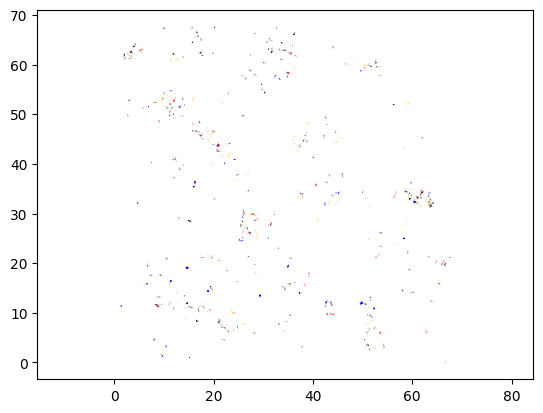

In [75]:
X1,Y1 = list(data_stripped['x'][(data_stripped['GM_Label']==1)].values),list(data_stripped['y'][(data_stripped['GM_Label']==1)].values)
for x,y in zip(X1,Y1):
    plt.plot(x,y,c='k',linewidth=0.1)
X2,Y2 = list(data_stripped['x'][(data_stripped['GM_Label']==2)].values),list(data_stripped['y'][(data_stripped['GM_Label']==2)].values)
for x,y in zip(X2,Y2):
    plt.plot(x,y,c='red',linewidth=0.1)
X3,Y3 = list(data_stripped['x'][(data_stripped['GM_Label']==0)].values),list(data_stripped['y'][(data_stripped['GM_Label']==0)].values)
for x,y in zip(X3,Y3):
    plt.plot(x,y,c='blue',linewidth=0.1)
    
X4,Y4 = list(data_stripped['x'][(data_stripped['GM_Label']==3)].values),list(data_stripped['y'][(data_stripped['GM_Label']==3)].values)
for x,y in zip(X4,Y4):
    plt.plot(x,y,c='orange',linewidth=0.1)
    
X5,Y5 = list(data_stripped['x'][(data_stripped['GM_Label']==4)].values),list(data_stripped['y'][(data_stripped['GM_Label']==4)].values)
for x,y in zip(X5,Y5):
    plt.plot(x,y,c='green',linewidth=0.1)
    
plt.axis('equal')
plt.savefig('test.pdf',dpi=1200)
plt.show()

In [86]:
#Try to determine automatically the index for the confined group CAREFUL NEED TO SET BY HAND THE LABEL FOR FAST POPULATION
index = [0,1,2,3]
D_per_group = []
for indx in index:
    Dmean = data_stripped['D'][(data_stripped['GM_Label']==indx)].mean()
    D_per_group.append(Dmean)

index_confined = D_per_group.index(min(D_per_group))
labels_GM = list(data_stripped['GM_Label'].values)
labels = ['fast_pop' if x==1 or x==2 else 'transport' if x==3 else 'nan' for x in labels_GM]

data_stripped['Label']=labels

In [194]:
#display(data_stripped)

In [87]:
frames = [data_done, data_stripped[(data_stripped['Label'] != 'nan')]]
result = pd.concat(frames)
#display(result)

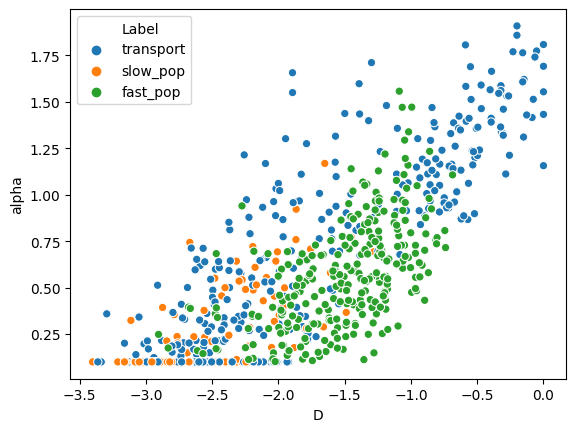

In [88]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',hue='Label',data=result)
plt.show()

Compute the TE-MSD and ensemble variance...


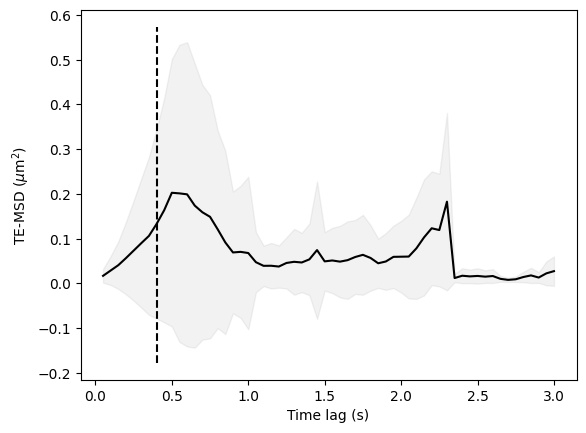

You have set a cutoff at  0.4  s...
Done. The TE-MSD and associated variance have been generated.


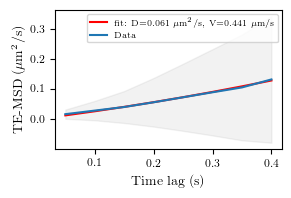

In [83]:
MSDtransport = list(result['MSD'][(result['Label']=='transport')].values)
temsd,var,timelag = TE_MSD(MSDtransport,cutoff=0.4)

from scipy.optimize import curve_fit

def drift_model(timelag, D, V):
    return(4*D*timelag+(V**2)*(timelag**2))

popt, pcov = curve_fit(drift_model, timelag, temsd)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.8, hspace=0.8)
ax = fig.add_subplot(grid[0,0])
ax.plot(timelag, drift_model(timelag, *popt), 'r-',label=r'fit: D=%5.3f $\mu$m$^2/$s, V=%5.3f $\mu$m/s' % tuple(popt))
ax.plot(timelag,temsd,label='Data')
ax.fill_between(timelag,[msd+np.sqrt(var) for msd,var in zip(temsd,var)], [msd-np.sqrt(var) for msd,var in zip(temsd,var)],color='gray',alpha=0.1)
#ax.set_xlim(0.05,30)
ax.set_xlabel('Time lag (s)')
ax.set_ylabel(r'TE-MSD ($\mu$m$^2/$s)')
plt.legend(fontsize=6)
#fig.savefig('Drift/Plots/drift_movie_ensemble_msd_fit.pdf', format='pdf', bbox_inches='tight')
plt.show()
#Michalet(MSDfast,cutoff=1) #CAREFUL THIS IS SLOW DUE TO THE VERY LONG TRACKS


Compute the TE-MSD and ensemble variance...


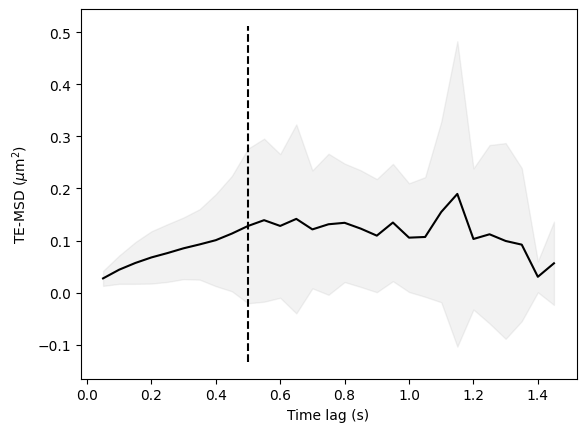

You have set a cutoff at  0.5  s...
Done. The TE-MSD and associated variance have been generated.
#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  282
Number of T-MSDs at time lag  0.1  =  282
Number of T-MSDs at time lag  0.15  =  282
Number of T-MSDs at time lag  0.2  =  282
Number of T-MSDs at time lag  0.25  =  282
Number of T-MSDs at time lag  0.3  =  282
Number of T-MSDs at time lag  0.35  =  282
Number of T-MSDs at time lag  0.4  =  282
Number of T-MSDs at time lag  0.45  =  282
Number of T-MSDs at time lag  0.5  =  282
Number of T-MSDs at time lag  0.55  =  218
Number of T-MSDs at time lag  0.6  =  161
Number of T-MSDs at time lag  0.65  =  127
Number of T-MSDs at time lag  0.7  =  91
Number of T-MSDs at time lag  0.75  =  69
Number of T-MSDs at time lag  0.8  =  54
Number of T-MSDs at time lag  0.85  =  42
N

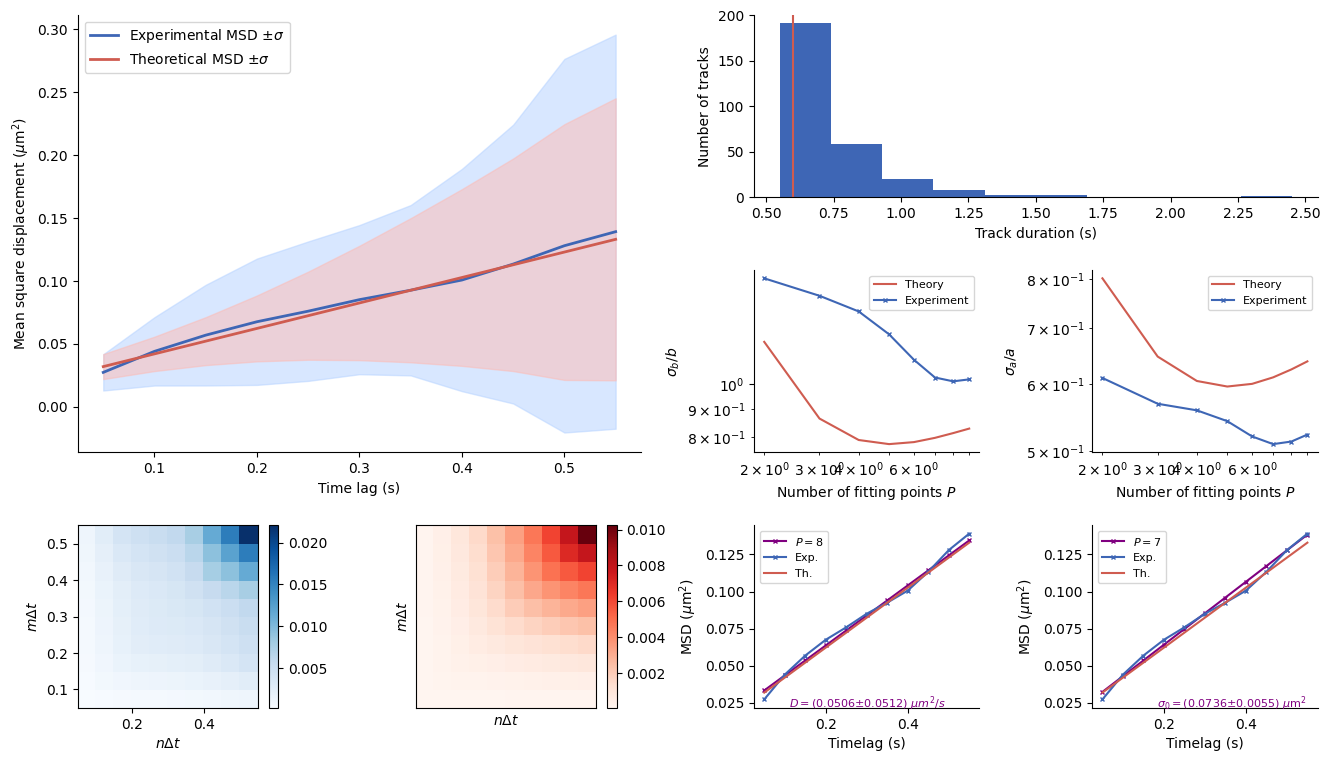

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0506, 0.0512, 0.0736, 0.0055)

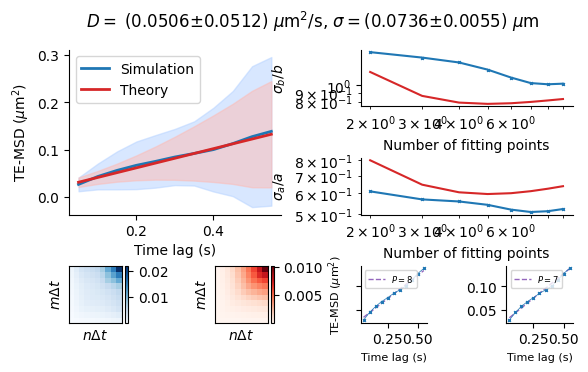

In [90]:
MSDfast = list(result['MSD'][(result['Label']=='fast_pop')].values)
temsd,var,timelag = TE_MSD(MSDfast,cutoff=0.5)
Michalet(MSDfast,cutoff=0.6)

Compute the TE-MSD and ensemble variance...


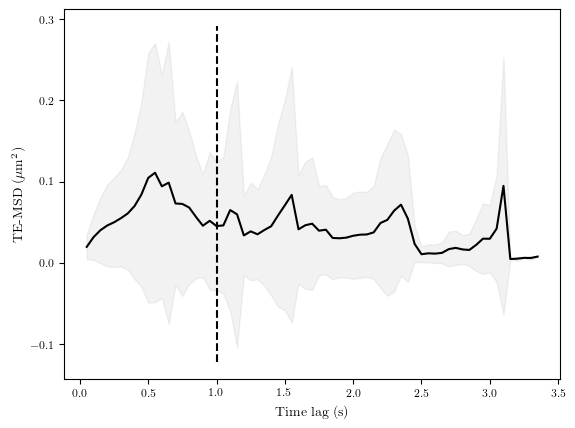

You have set a cutoff at  1  s...
Done. The TE-MSD and associated variance have been generated.
#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  316
Number of T-MSDs at time lag  0.1  =  316
Number of T-MSDs at time lag  0.15  =  316
Number of T-MSDs at time lag  0.2  =  316
Number of T-MSDs at time lag  0.25  =  316
Number of T-MSDs at time lag  0.3  =  316
Number of T-MSDs at time lag  0.35  =  316
Number of T-MSDs at time lag  0.4  =  307
Number of T-MSDs at time lag  0.45  =  293
Number of T-MSDs at time lag  0.5  =  282
Number of T-MSDs at time lag  0.55  =  230
Number of T-MSDs at time lag  0.6  =  182
Number of T-MSDs at time lag  0.65  =  149
Number of T-MSDs at time lag  0.7  =  118
Number of T-MSDs at time lag  0.75  =  95
Number of T-MSDs at time lag  0.8  =  80
Number of T-MSDs at time lag  0.85  =  66
Nu

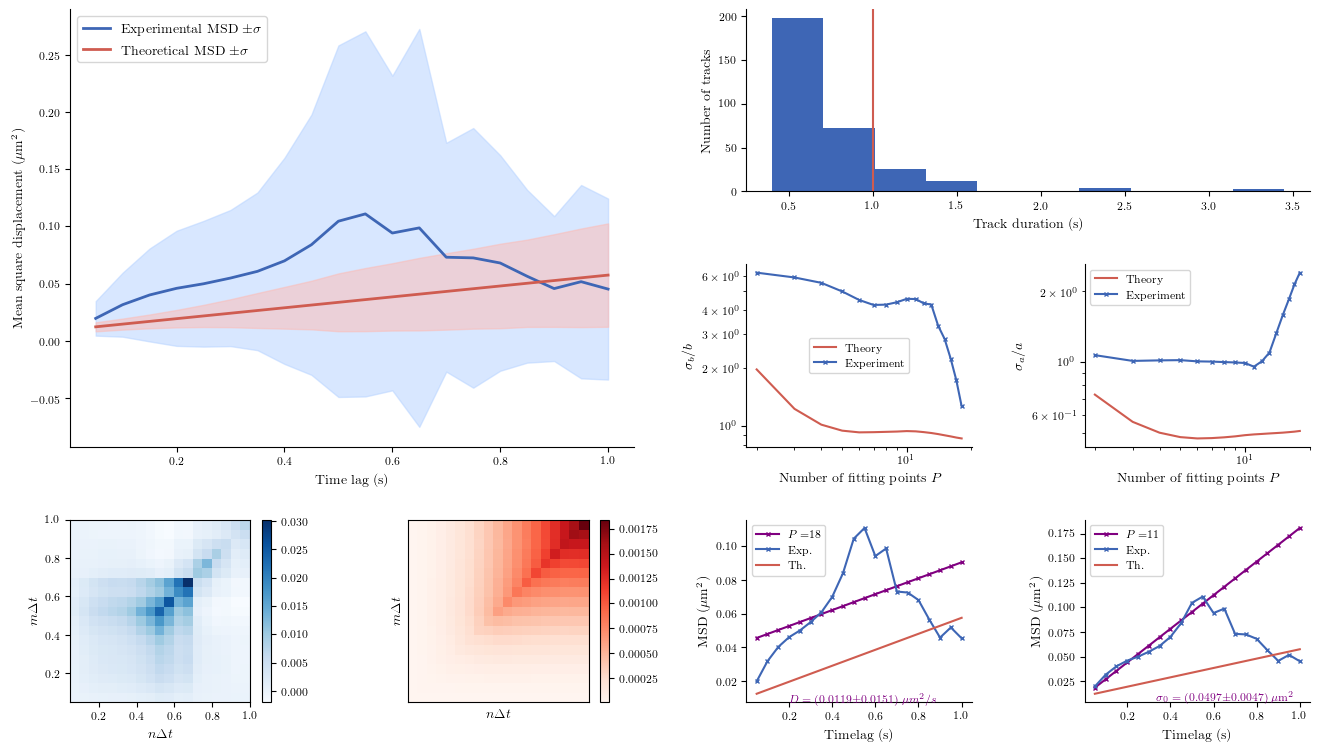

/home/remy13127/Documents/Internship/Functions/functions.py:1013: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(0.0119, 0.0151, 0.0497, 0.0047)

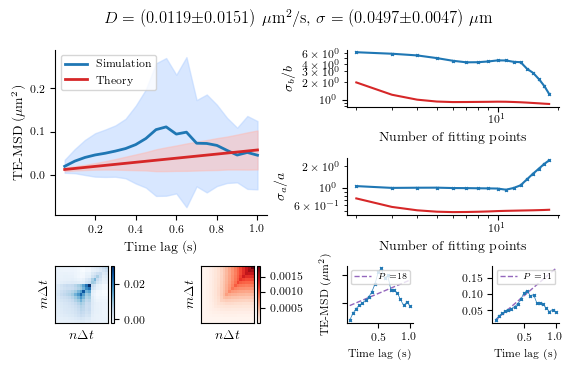

In [85]:
MSDfast = list(result['MSD'][(result['Label']=='slow_pop')].values)
temsd,var,timelag = TE_MSD(MSDfast,cutoff=1)
Michalet(MSDfast,cutoff=1)